In [85]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC




In [87]:
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')



In [88]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
X_test = X_test.reshape(len(X_test), 100, 100, 3)

Y_train = Y_train.reshape(len(Y_train),1)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255
X_test = X_test/255

In [89]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2000, 100, 100, 3)
(400, 100, 100, 3)
(2000, 1)
(400, 1)


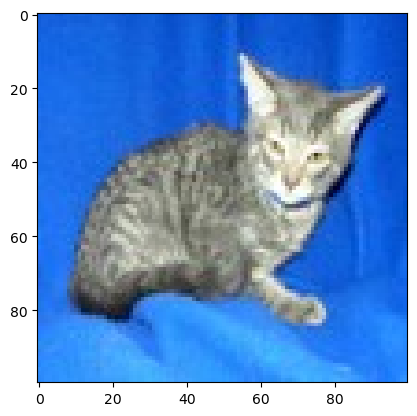

In [90]:
index = random.randint(0, len(X_train))
plt.imshow(X_train[index])

In [91]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),    # Added layer
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),    # Added layer
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),             # Increased neurons
    Dropout(0.5),                              # Added dropout
    Dense(1, activation='sigmoid')
])


In [92]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())  # New
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [93]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', AUC()]
)

In [95]:
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True, monitor='val_accuracy'),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-6, monitor='val_loss'),
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')
]

In [96]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

datagen.fit(X_train)

In [97]:
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    epochs=50,
    validation_data=(X_test, Y_test),
    callbacks=callbacks
)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 379ms/step - accuracy: 0.5404 - auc: 0.5593 - loss: 1.0890 - val_accuracy: 0.5275 - val_auc: 0.5206 - val_loss: 0.7548 - learning_rate: 0.0010
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 461ms/step - accuracy: 0.5588 - auc: 0.5845 - loss: 0.8437 - val_accuracy: 0.4975 - val_auc: 0.6558 - val_loss: 0.7068 - learning_rate: 0.0010
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 356ms/step - accuracy: 0.5382 - auc: 0.5714 - loss: 0.7850 - val_accuracy: 0.5200 - val_auc: 0.5893 - val_loss: 0.6868 - learning_rate: 0.0010
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 356ms/step - accuracy: 0.5728 - auc: 0.6324 - loss: 0.7049 - val_accuracy: 0.5075 - val_auc: 0.6126 - val_loss: 0.7737 - learning_rate: 0.0010
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 356ms/step - accuracy: 0.5792 - auc: 0.6180 - loss: 0.7316 - val_accuracy: 0.5150 - val_auc: 0.5399 - val_loss: 0.7288 - learning_rate: 0.0010
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 363ms/step - accuracy: 0.6163 - a

In [98]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.8148 - auc: 0.4981 - loss: 0.4030


[0.4539121389389038, 0.7925000190734863, 0.873462438583374]

In [2]:
idx2 = random.randint(0, len(X_test))
plt.imshow(X_test[idx2])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5
if (y_pred == 0):
    print('Dog')
else:
    print('Cat')

NameError: name 'random' is not defined